# Desafio do Titanic

O problema do Titanic é um clássico em ciência de dados, com o objetivo de prever a sobrevivência de passageiros em um naufrágio. É um problema de classificação binária baseado em um conjunto de dados com informações de 891 passageiros, onde 342 sobreviveram.

A base está disponível no github da Suzana Viana Mota, o link é https://github.com/suzanasvm/TitanicUdacity contei a base utilizada de 59.8 KB.

As atribuições da base são: PassengerId, que é a identificação dos passageiros; Survived, que indica se o passageiro sobreviveu (1) ou não (0); Pclass, que representa a classe; Name, que é o nome dos passageiros; Sex, que é o gênero; Age, que é a idade em anos; SibSp, que representa a quantidade de irmãos ou cônjuges a bordo do Titanic; Parch, que representa a quantidade de pais ou crianças a bordo do Titanic; Ticket, que é o número do bilhete; Fare, que é a tarifa paga; Cabin, que é a cabine; e Embarked, que indica o local do embarque.

In [521]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\marya\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas  as pd

In [3]:
base_original = pd.read_csv("titanic-data-6.csv")

In [4]:
base_original[["nome","sobrenome"]] = base_original["Name"].str.split(",", expand=True)

In [5]:
base_original["sobrenome"].str.split(".", expand=True)

,0,1,2
0,Mr,Owen Harris,None
1,Mrs,John Bradley (Florence Briggs Thayer),None
2,Miss,Laina,None
3,Mrs,Jacques Heath (Lily May Peel),None
4,Mr,William Henry,None
...,...,...,...
886,Rev,Juozas,None
887,Miss,Margaret Edith,None
888,Miss,"Catherine Helen ""Carrie""",None
889,Mr,Karl Howell,None


In [6]:
base_original[["titulos","sobrenome", "sujeira"]] = base_original["sobrenome"].str.split(".",    expand=True)

In [7]:
base_original.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'nome', 'sobrenome',
       'titulos', 'sujeira'],
      dtype='object')

In [8]:
base_analisada = base_original[['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked',
       'titulos']]


In [9]:
base_analisada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  titulos      891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
base_analisada["Ticket"].dtypes == "O"

True

In [11]:
base_analisada_str = pd.DataFrame()
base_analisada_int = pd.DataFrame()

In [12]:
for i in base_analisada.columns:
    if base_analisada[i].dtypes == "O":
        base_analisada_str[i] = base_analisada[i]
    else:
        base_analisada_int[i] = base_analisada[i]


In [13]:
base_analisada_str

,Sex,Ticket,Cabin,Embarked,titulos
0,male,A/5 21171,NaN,S,Mr
1,female,PC 17599,C85,C,Mrs
2,female,STON/O2. 3101282,NaN,S,Miss
3,female,113803,C123,S,Mrs
4,male,373450,NaN,S,Mr
...,...,...,...,...,...
886,male,211536,NaN,S,Rev
887,female,112053,B42,S,Miss
888,female,W./C. 6607,NaN,S,Miss
889,male,111369,C148,C,Mr


In [17]:
base_analisada.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
base_analisada.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'titulos'],
      dtype='object')

In [19]:
from sklearn.model_selection import train_test_split
import numpy as np

X = base_analisada[['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'titulos']].values
y = base_analisada["Survived"].values

# Separa os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# Imprime o número de amostras em cada conjunto
print(f"Treinamento: {len(X_train)}, Teste: {len(X_test)}")

Treinamento: 623, Teste: 268


In [20]:
dt_train = pd.DataFrame(X_train, columns= base_analisada.columns)

In [21]:
base_analisada.Survived.value_counts()/len(base_analisada.Survived)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [22]:
dt_train.Survived.value_counts()/len(dt_train.Survived)

0    0.629213
1    0.370787
Name: Survived, dtype: float64

# Explorar dados

1-Tratar null
2-Falata um dicionario para identificar o que é cada coluna e o valores. 
3-Estudar mais correlação.

In [ ]:
mport plotly.graph_objs as go
import plotly.express as px
import plotly.subplots as sp
import pandas as pd

def analise_univariavel(df_analise,coluna_alvo, Sobreviv=None):

    if Sobreviv == True:
        df1  = df_analise[["PassengerId",coluna_alvo,"Survived"]].groupby([coluna_alvo,"Survived"]).count().reset_index()

        df1 = pd.pivot_table(df1, values='PassengerId', index=[coluna_alvo], columns=['Survived'], aggfunc=sum).reset_index()
        df1.columns.name = ''
        df1.columns = [coluna_alvo,"Nao Sobreviveu","Sobreviveu"]

        df1['% Sobreviveu'] = round(df1['Sobreviveu'] / (df1['Sobreviveu'] + df1['Nao Sobreviveu']) * 100,2)

        df2 = df1.copy()

        # Create a table trace
        table_trace = go.Table(
            header=dict(values=list(df2.columns)),
            cells=dict(values=[df2[col] for col in df2.columns])
        )

        # Create a subplot with a pie chart and a table
        fig = sp.make_subplots(rows=1, cols=2, specs=[[{'type': 'bar'}, {'type': 'table'}]])

        # Add the pie chart trace to the subplot
        fig.add_trace(
            go.Bar(
                name="Nao Sobreviveu",
                x=df2[coluna_alvo],
                y=df2["Nao Sobreviveu"],
                offsetgroup=0,
            ),
            row=1,
            col=1,
        )
        fig.add_trace(
            go.Bar(
                name="Sobreviveu",
                x=df2[coluna_alvo],
                y=df2["Sobreviveu"],
                offsetgroup=1
            ),
            row=1,
            col=1,

        )

        # Add the table trace to the subplot
        fig.add_trace(table_trace, row=1, col=2)

        # Set the layout of the subplot
        fig.update_layout(barmode="stack",title='Análise de '+ coluna_alvo + " no Titanic" )

        # Show the plot
        return fig.show()
        
    
    else:
        df1  =df_analise[["PassengerId",coluna_alvo]].groupby(coluna_alvo).count().reset_index()
        df1.insert(0,"Colunas", coluna_alvo)
        df1.columns = ["Colunas","Categoria","Qts PassengerId"]

        # Create a sample DataFrame
        df2 = df1[['Categoria','Qts PassengerId']].sort_values("Qts PassengerId", ascending=False)

        # Create a pie chart trace
        pie_trace = go.Pie(labels=df2['Categoria'], values=df2['Qts PassengerId'])

        # Create a table trace
        table_trace = go.Table(
            header=dict(values=list(df2.columns)),
            cells=dict(values=[df2[col] for col in df2.columns])
        )

        # Create a subplot with a pie chart and a table
        fig = sp.make_subplots(rows=1, cols=2, specs=[[{'type': 'pie'}, {'type': 'table'}]])

        # Add the pie chart trace to the subplot
        fig.add_trace(pie_trace, row=1, col=1)

        # Add the table trace to the subplot
        fig.add_trace(table_trace, row=1, col=2)

        # Set the layout of the subplot
        fig.update_layout(title='Análise de '+ coluna_alvo + " no Titanic" )

        # Show the plot
        return fig.show()


In [176]:
dt_train_Expl = dt_train.copy()

In [177]:

null_counts = dt_train_Expl.isnull().sum()
null_counts

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            124
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          484
Embarked         1
titulos          0
dtype: int64

In [178]:
dt_train_Expl["Age"] = dt_train_Expl["Age"].fillna(-1)
dt_train_Expl = dt_train_Expl.fillna("Nao tem")

In [193]:
dt_train_Expl[dt_train_Expl["Cabin"].apply(lambda x: len(x) > 5 and x != "Nao tem")].sort_values("Cabin")

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,titulos
281,680,1,1,male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Mr
418,873,0,1,male,33.0,0,0,695,5.0000,B51 B53 B55,S,Mr
362,790,0,1,male,46.0,0,0,PC 17593,79.2000,B82 B84,C,Mr
518,764,1,1,female,36.0,1,2,113760,120.0000,B96 B98,S,Mrs
621,436,1,1,female,14.0,1,2,113760,120.0000,B96 B98,S,Miss
358,298,0,1,female,2.0,1,2,113781,151.5500,C22 C26,S,Miss
503,499,0,1,female,25.0,1,2,113781,151.5500,C22 C26,S,Mrs
179,89,1,1,female,23.0,3,2,19950,263.0000,C23 C25 C27,S,Miss
240,342,1,1,female,24.0,3,2,19950,263.0000,C23 C25 C27,S,Miss
387,439,0,1,male,64.0,1,4,19950,263.0000,C23 C25 C27,S,Mr


- Retirar a coluna Cabin, pois tem poucos com valores para analisar

In [209]:
dt_train_Expl[(dt_train_Expl["Ticket"].apply(lambda x: len(x) > 7 and x != "Nao tem")) & (dt_train_Expl["Ticket"].str.contains("A"))].sort_values("Ticket")

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,titulos
310,38,0,3,male,21.0,0,0,A./5. 2152,8.0500,Nao tem,S,Mr
302,590,0,3,male,-1.0,0,0,A./5. 3235,8.0500,Nao tem,S,Mr
327,153,0,3,male,55.5,0,0,A.5. 11206,8.0500,Nao tem,S,Mr
364,489,0,3,male,30.0,0,0,A.5. 18509,8.0500,Nao tem,S,Mr
542,566,0,3,male,24.0,2,0,A/4 48871,24.1500,Nao tem,S,Mr
38,812,0,3,male,39.0,0,0,A/4 48871,24.1500,Nao tem,S,Mr
466,575,0,3,male,16.0,0,0,A/4. 20589,8.0500,Nao tem,S,Mr
55,52,0,3,male,21.0,0,0,A/4. 39886,7.8000,Nao tem,S,Mr
186,1,0,3,male,22.0,1,0,A/5 21171,7.2500,Nao tem,S,Mr
253,321,0,3,male,22.0,0,0,A/5 21172,7.2500,Nao tem,S,Mr


In [286]:
dtf = dt_train_Expl[["PassengerId","Ticket","Survived"]].groupby(["Ticket"]).count().reset_index().sort_values(["Ticket","PassengerId"], ascending=False)

dt_train_Expl['Grupo'] = dt_train_Expl["Ticket"].duplicated(keep=False).map({True: "Sim", False: "Não"})


In [ ]:
- Retirar a coluna Ticket, pois não agrega a analise

In [98]:
# colunas categóricas
dt_train_Expl[['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'titulos']]


,Survived,Pclass,Sex,SibSp,Parch,Embarked,titulos
0,1,1,male,0,2,S,Master
1,0,3,male,0,0,S,Mr
2,1,3,female,1,1,S,Miss
3,0,2,male,1,2,S,Mr
4,0,2,male,1,1,S,Mr
...,...,...,...,...,...,...,...
618,1,3,female,0,0,S,Miss
619,0,1,male,0,0,S,Mr
620,0,3,male,2,0,S,Mr
621,1,1,female,1,2,S,Miss


In [401]:
df1  = dt_train_Expl[["PassengerId","Sex","Survived"]].groupby(["Sex","Survived"]).count().reset_index()

df1 = pd.pivot_table(df1, values='PassengerId', index=["Sex"], columns=['Survived'], aggfunc=sum).reset_index()
df1.columns.name = ''
df1.columns = ["Sex","Nao Sobreviveu","Sobreviveu"]

df1['% Sobreviveu'] = round(df1['Sobreviveu'] / (df1['Sobreviveu'] + df1['Nao Sobreviveu']) * 100,2)


In [402]:
df1

,Sex,Nao Sobreviveu,Sobreviveu,% Sobreviveu
0,female,58,155,72.77
1,male,334,76,18.54


In [437]:
dt_train_Expl[dt_train_Expl["Age"] != -1]["Age"].describe()

count    499.000000
mean      29.256353
std       14.558567
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [459]:
intervalos = [0, 12, 23, 29, 35, 45, 80]

# criar as categorias a partir dos intervalos
dt_train_Expl["Age_Intervalo"] = pd.cut(dt_train_Expl["Age"], bins=intervalos)
dt_train_Expl["Age_Intervalo"] = np.where(dt_train_Expl["Age_Intervalo"].isnull(), "Não tem", dt_train_Expl["Age_Intervalo"]).astype(str)

In [460]:
dt_train_Expl["Age_Intervalo"].value_counts()

Não tem         124
(12.0, 23.0]    119
(23.0, 29.0]     99
(29.0, 35.0]     83
(35.0, 45.0]     75
(45.0, 80.0]     70
(0.0, 12.0]      53
Name: Age_Intervalo, dtype: int64

In [506]:
analise_univariavel(dt_train_Expl,"Fare_Intervalo",True)

In [464]:
dt_train_Expl["Fare"].describe()

count    623.000000
mean      31.840730
std       51.027372
min        0.000000
25%        7.925000
50%       14.454200
75%       30.750000
max      512.329200
Name: Fare, dtype: float64

In [502]:
intervalos = [0, 8, 15, 30, 513]

# criar as categorias a partir dos intervalos
dt_train_Expl["Fare"] = np.where(dt_train_Expl["Fare"] == 0.0, 0.001, dt_train_Expl["Fare"])
dt_train_Expl["Fare_Intervalo"] = pd.cut(dt_train_Expl["Fare"], bins=intervalos).astype(str)

In [503]:
dt_train_Expl["Fare_Intervalo"].value_counts()

(0, 8]       167
(30, 513]    161
(8, 15]      152
(15, 30]     143
Name: Fare_Intervalo, dtype: int64

In [507]:
dt_train_Expl

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,titulos,Grupo,Age_Intervalo,Fare_Intervalo
0,446,1,1,male,4.0,0,2,33638,81.8583,A34,S,Master,Não,"(0.0, 12.0]","(30, 513]"
1,651,0,3,male,-1.0,0,0,349221,7.8958,Nao tem,S,Mr,Não,Não tem,"(0, 8]"
2,173,1,3,female,1.0,1,1,347742,11.1333,Nao tem,S,Miss,Sim,"(0.0, 12.0]","(8, 15]"
3,451,0,2,male,36.0,1,2,C.A. 34651,27.7500,Nao tem,S,Mr,Sim,"(35.0, 45.0]","(15, 30]"
4,315,0,2,male,43.0,1,1,F.C.C. 13529,26.2500,Nao tem,S,Mr,Sim,"(35.0, 45.0]","(15, 30]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,107,1,3,female,21.0,0,0,343120,7.6500,Nao tem,S,Miss,Não,"(12.0, 23.0]","(0, 8]"
619,271,0,1,male,-1.0,0,0,113798,31.0000,Nao tem,S,Mr,Não,Não tem,"(30, 513]"
620,861,0,3,male,41.0,2,0,350026,14.1083,Nao tem,S,Mr,Não,"(35.0, 45.0]","(8, 15]"
621,436,1,1,female,14.0,1,2,113760,120.0000,B96 B98,S,Miss,Sim,"(12.0, 23.0]","(30, 513]"


In [509]:
dt_train_Expl[['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch','Fare', 'Embarked', 'titulos', 'Grupo',
       'Age_Intervalo', 'Fare_Intervalo']]dt_train_Expl

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,titulos,Grupo,Age_Intervalo,Fare_Intervalo
0,446,1,1,male,4.0,0,2,81.8583,S,Master,Não,"(0.0, 12.0]","(30, 513]"
1,651,0,3,male,-1.0,0,0,7.8958,S,Mr,Não,Não tem,"(0, 8]"
2,173,1,3,female,1.0,1,1,11.1333,S,Miss,Sim,"(0.0, 12.0]","(8, 15]"
3,451,0,2,male,36.0,1,2,27.7500,S,Mr,Sim,"(35.0, 45.0]","(15, 30]"
4,315,0,2,male,43.0,1,1,26.2500,S,Mr,Sim,"(35.0, 45.0]","(15, 30]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,107,1,3,female,21.0,0,0,7.6500,S,Miss,Não,"(12.0, 23.0]","(0, 8]"
619,271,0,1,male,-1.0,0,0,31.0000,S,Mr,Não,Não tem,"(30, 513]"
620,861,0,3,male,41.0,2,0,14.1083,S,Mr,Não,"(35.0, 45.0]","(8, 15]"
621,436,1,1,female,14.0,1,2,120.0000,S,Miss,Sim,"(12.0, 23.0]","(30, 513]"


In [ ]:
import pandas as pd
from scipy.stats import spearmanr

# Codificar a coluna categórica em valores numéricos
df['category_encoded'], _ = pd.factorize(df['category'])

# Calcular o coeficiente de correlação de Spearman
corr, p = spearmanr(df['category_encoded'], df['numeric'])

# Imprimir o resultado
print(f"Coeficiente de correlação de Spearman: {corr:.3f}")
print(f"Valor p: {p:.3f}")

## Correlação

In [510]:
corr_matrix = dt_train_Expl.corr()

In [511]:
corr_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.006853,-0.046089,0.022908,-0.083601,0.004945,0.019153
Survived,0.006853,1.000000,-0.312233,0.026912,-0.049527,0.076756,0.239059
Pclass,-0.046089,-0.312233,1.000000,-0.360699,0.097146,0.030596,-0.529210
Age,0.022908,0.026912,-0.360699,1.000000,-0.199962,-0.057010,0.140637
SibSp,-0.083601,-0.049527,0.097146,-0.199962,1.000000,0.440442,0.154611
Parch,0.004945,0.076756,0.030596,-0.057010,0.440442,1.000000,0.208618
Fare,0.019153,0.239059,-0.529210,0.140637,0.154611,0.208618,1.000000


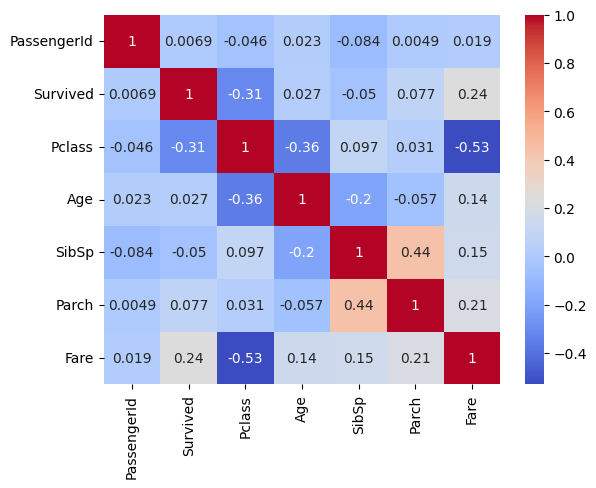

In [516]:
import matplotlib.pyplot as plt
import seaborn as sns

# Cria o heatmap da matriz de correlação
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Mostra o gráfico
plt.show()


In [518]:
import numpy as np

# seleciona apenas as colunas de interesse

data = dt_train_Expl[dt_train_Expl.columns].values

# verifica o shape do array resultante
print(data.shape)

(623, 15)


In [519]:
from scipy.stats import pearsonr

corr, pvalue = pearsonr(data[:, 0], data[:, 1])
print('Correlação:', corr)
print('P-valor:', pvalue)


Correlação: 0.006853110817029103
P-valor: 0.8644502985648679


In [523]:
import statsmodels.api as sm

X = sm.add_constant(data[:, :2])
y = data[:, 2]

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

# Reciclagem

In [ ]:
import pandas as pd

# criando um DataFrame de exemplo
df = pd.DataFrame({
    'Coluna1': [10, 20, 30, 40],
    'Coluna2': [20, 30, 40, 50],
    'Coluna3': [5, 15, 25, 50]
})

# calculando a correlação entre Coluna1 e Coluna2
corr = df['Coluna1'].corr(df['Coluna2'])

# aplicando o estilo de barra com a largura da barra proporcional à correlação
df.style.bar(subset=['Coluna1', 'Coluna2'], color='#d65f5f', width=corr*5)

In [ ]:
[dt_train_Expl["Cabin"][i][0] for i in range(len(dt_train_Expl["Cabin"]))]

In [71]:
import plotly.graph_objs as go
import pandas as pd

# Criar um DataFrame de exemplo com variáveis categóricas
df = pd.DataFrame({
    'Categoria': ['A', 'B', 'B', 'C', 'C', 'C', 'D', 'D', 'D', 'D'],
    'Valor': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
})

# Criar uma tabela de frequência das categorias
freq_table = df['Categoria'].value_counts()

# Criar um gráfico de pizza usando Plotly
fig = go.Figure(data=[go.Pie(labels=freq_table.index, values=freq_table.values)])

# Adicionar botões de seleção de coluna ao gráfico
buttons = []
for coluna in df['Categoria'].unique():
    button = dict(
        label=coluna,
        method="update",
        args=[{"values": [freq_table[coluna]]}]
    )
    buttons.append(button)

fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=buttons,
            showactive=True,
            direction="down",
            x=0.5,
            y=1.2
        )
    ]
)

# Mostrar o gráfico
fig.show()



